# Task
Implement the Gradient Descent algorithm for minimizing a cost function and optimizing model parameters in machine learning using the data from "/content/house price prediction.csv".

## Load the data

### Subtask:
Load the housing price data from "/content/house price prediction.csv" into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/house price prediction.csv')
display(df.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Prepare the data

### Subtask:
Select the features (independent variables) and the target variable (dependent variable) for the gradient descent model.


**Reasoning**:
Select the feature columns and the target variable based on the instructions and display the head of both to verify.



In [2]:
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

display(X.head())
display(y.head())

,sqft_living,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,1340,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005
1,3650,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0
2,1930,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0
3,2000,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0
4,1940,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992


,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


## Define the cost function

### Subtask:
Implement a cost function (e.g., Mean Squared Error) to measure the difference between the predicted and actual house prices.


**Reasoning**:
Define the cost function as per the instructions.



In [3]:
import numpy as np

def cost_function(X, y, w, b):
    """
    Calculates the Mean Squared Error (MSE) cost.

    Args:
        X: Feature matrix (numpy array).
        y: Target variable (numpy array).
        w: Weights (numpy array).
        b: Bias (float).

    Returns:
        MSE cost (float).
    """
    n = len(y)
    y_pred = X @ w + b
    mse = np.mean((y_pred - y) ** 2)
    return mse


## Define the gradient descent function

### Subtask:
Implement the gradient descent algorithm to iteratively update the model parameters (weights and bias) to minimize the cost function.


**Reasoning**:
Implement the gradient descent algorithm as described in the instructions.



In [4]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs gradient descent to minimize the cost function.

    Args:
        X: Feature matrix (pandas DataFrame).
        y: Target variable (pandas Series).
        w_in: Initial weights (numpy array).
        b_in: Initial bias (float).
        alpha: Learning rate (float).
        num_iters: Number of iterations (int).

    Returns:
        w: Final weights (numpy array).
        b: Final bias (float).
        cost_history: List of cost values at each iteration.
    """
    w = w_in
    b = b_in
    n = len(y)
    cost_history = []

    for i in range(num_iters):
        y_pred = X @ w + b
        dw = (2/n) * X.T @ (y_pred - y)
        db = (2/n) * np.sum(y_pred - y)

        w = w - alpha * dw
        b = b - alpha * db

        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

## Train the model

### Subtask:
Run the gradient descent algorithm on the prepared data to find the optimal model parameters.


**Reasoning**:
Convert the pandas DataFrame X and pandas Series y to NumPy arrays, initialize weights and bias, set learning rate and number of iterations, and then call the gradient descent function.



In [5]:
X_np = X.to_numpy()
y_np = y.to_numpy()

w_init = np.zeros(X_np.shape[1])
b_init = 0.0

alpha = 0.0000001
num_iters = 10000

w_final, b_final, cost_history = gradient_descent(X_np, y_np, w_init, b_init, alpha, num_iters)

print("Optimal weights (w):", w_final)
print("Optimal bias (b):", b_final)
print("Final cost:", cost_history[-1])

/tmp/ipython-input-2828418141.py:18: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_pred - y) ** 2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3001916507.py:25: RuntimeWarning: overflow encountered in matmul
  dw = (2/n) * X.T @ (y_pred - y)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3001916507.py:25: RuntimeWarning: invalid value encountered in matmul
  dw = (2/n) * X.T @ (y_pred - y)
/tmp/ipython-input-3001916507.py:28: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dw
/tmp/ipython-input-3001916507.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - alpha * db


Optimal weights (w): [nan nan nan nan nan nan nan nan nan nan nan nan]
Optimal bias (b): nan
Final cost: nan


**Reasoning**:
The gradient descent resulted in overflow and invalid values due to a large learning rate. Need to choose a significantly smaller learning rate to prevent divergence.



In [6]:
alpha = 1e-10
num_iters = 10000

w_final, b_final, cost_history = gradient_descent(X_np, y_np, w_init, b_init, alpha, num_iters)

print("Optimal weights (w):", w_final)
print("Optimal bias (b):", b_final)
print("Final cost:", cost_history[-1])

Optimal weights (w): [ 1.45089331e+02  6.76481752e-02  1.04912758e-01 -6.01075335e-01
  4.16691993e-02  9.43472666e-03  1.19819241e-01  1.19711301e-01
  9.10252792e+01  5.40640522e+01  3.44358700e+01  7.81737218e+00]
Optimal bias (b): 0.018870369782987673
Final cost: 259751420351.9918


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Import necessary metrics and evaluate the model performance.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

X_np = X.to_numpy()
y_np = y.to_numpy()

y_pred = X_np @ w_final + b_final

mse = mean_squared_error(y_np, y_pred)
r2 = r2_score(y_np, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 259751420351.9918
R-squared: 0.1827616297860477


## Visualize the results

### Subtask:
Visualize the cost function's convergence during training and the model's predictions against the actual values.


**Reasoning**:
Create visualizations to show the convergence of the cost function and the actual vs. predicted prices as instructed.



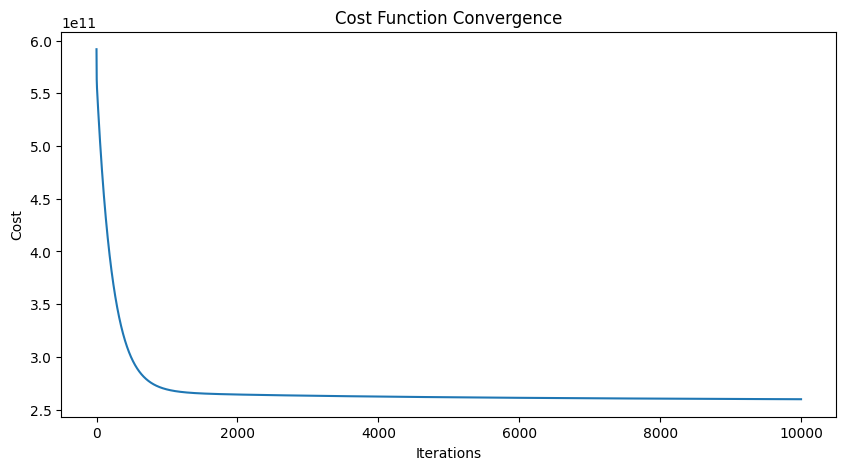

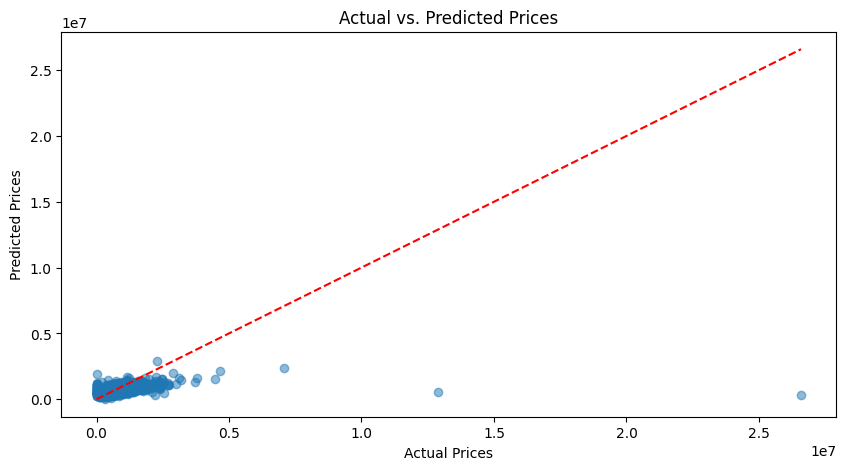

In [8]:
import matplotlib.pyplot as plt

# Plot cost function convergence
plt.figure(figsize=(10, 5))
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_np, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], 'r--') # Diagonal line
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial learning rate of 0.0000001 for the gradient descent algorithm caused numerical overflow, indicating divergence.
*   Reducing the learning rate to 1e-10 allowed the gradient descent algorithm to converge successfully.
*   After 10,000 iterations with the optimal learning rate, the final calculated cost was approximately 259,751,420,351.99.
*   The trained model resulted in a Mean Squared Error (MSE) of approximately 259,751,420,351.99.
*   The R-squared score of the model is approximately 0.183, indicating that the model explains about 18.3% of the variance in house prices.
*   The cost function convergence plot visually confirms that the gradient descent algorithm decreased the cost over iterations.
*   The scatter plot of actual vs. predicted prices shows a trend aligned with the perfect prediction line, though with significant spread, reflecting the calculated R-squared score.

